# Task
Analyze stock data by defining at least 3 stock tickers with date range for the past 1 to 5 years, downloading daily closing prices using `yfinance.

## Stock Tickers



In [1]:
tickers = ['AAPL', 'MSFT', 'GOOG']
print(f"Defined tickers: {tickers}")

Defined tickers: ['AAPL', 'MSFT', 'GOOG']


## Date Range


In [2]:
from datetime import datetime, timedelta

#end date as today's date
end_date = datetime.now()

#start date as 3 years prior to the end date
start_date = end_date - timedelta(days=3*365) # Approximately 3 years

# Formats
formatted_start_date = start_date.strftime('%Y-%m-%d')
formatted_end_date = end_date.strftime('%Y-%m-%d')

print(f"Start Date: {formatted_start_date}")
print(f"End Date: {formatted_end_date}")

Start Date: 2022-12-11
End Date: 2025-12-10


##Stock Data



In [4]:
stock_data = yf.download(tickers, start=formatted_start_date, end=formatted_end_date)
print("Stock data downloaded successfully.")
stock_data.head()

/tmp/ipython-input-1612350078.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start=formatted_start_date, end=formatted_end_date)
[*********************100%***********************]  3 of 3 completed

Stock data downloaded successfully.


Price            Close                               High             \
Ticker            AAPL       GOOG        MSFT        AAPL       GOOG   
Date                                                                   
2022-12-12  142.342590  92.863510  246.613693  142.352436  93.176168   
2022-12-13  143.308029  95.136467  250.920715  147.741150  99.057067   
2022-12-14  141.081619  94.600471  251.213776  144.480342  96.496256   
2022-12-15  134.471313  90.521072  243.195450  139.692547  93.330007   
2022-12-16  132.510895  90.183617  238.976334  135.604227  91.066991   

Price                          Low                               Open  \
Ticker            MSFT        AAPL       GOOG        MSFT        AAPL   
Date                                                                    
2022-12-12  246.642992  138.963559  91.215872  241.398390  140.579185   
2022-12-13  257.757259  142.096314  94.669965  247.160610  147.278134   
2022-12-14  256.458378  139.062083  93.240675  248.371722  143.189814   
2022-12-15  248.264262  134.008297  89.756808  241.564447  139.012799   
2022-12-16  244.006072  131.742488  89.339946  237.823880  134.658503   

Price                                 Volume                      
Ticker           GOOG        MSFT       AAPL      GOOG      MSFT  
Date                                                              
2022-12-12  92.397008  241.671850   70462700  27380900  30665100  
2022-12-13  97.339942  255.579321   93886200  34788500  42196900  
2022-12-14  94.828763  251.125881   82291200  26452900  35410900  
2022-12-15  92.843657  247.795475   98931900  28298800  35560400  
2022-12-16  90.521082  242.746201  160156900  48485500  86102000

extract only the Close prices for each stock into a new DataFrame.



In [5]:
closing_prices = stock_data['Close']
print("Extracted closing prices:")
closing_prices.head()

Extracted closing prices:


Ticker,AAPL,GOOG,MSFT
Date,,,
2022-12-12,142.342590,92.863510,246.613693
2022-12-13,143.308029,95.136467,250.920715
2022-12-14,141.081619,94.600471,251.213776
2022-12-15,134.471313,90.521072,243.195450
2022-12-16,132.510895,90.183617,238.976334


###Calculate Daily Returns



In [6]:
daily_returns = closing_prices.pct_change()
print("Calculated daily returns:")
daily_returns.head()

Calculated daily returns:


Ticker,AAPL,GOOG,MSFT
Date,,,
2022-12-12,NaN,NaN,NaN
2022-12-13,0.006783,0.024476,0.017465
2022-12-14,-0.015536,-0.005634,0.001168
2022-12-15,-0.046854,-0.043122,-0.031918
2022-12-16,-0.014579,-0.003728,-0.017349


### Calculate Expected Daily Return



In [7]:
expected_daily_returns = daily_returns.mean()
print("Expected Daily Returns for each stock:")
print(expected_daily_returns)

Expected Daily Returns for each stock:
Ticker
AAPL    0.001023
GOOG    0.001823
MSFT    0.001029
dtype: float64


### Visualize Daily Returns


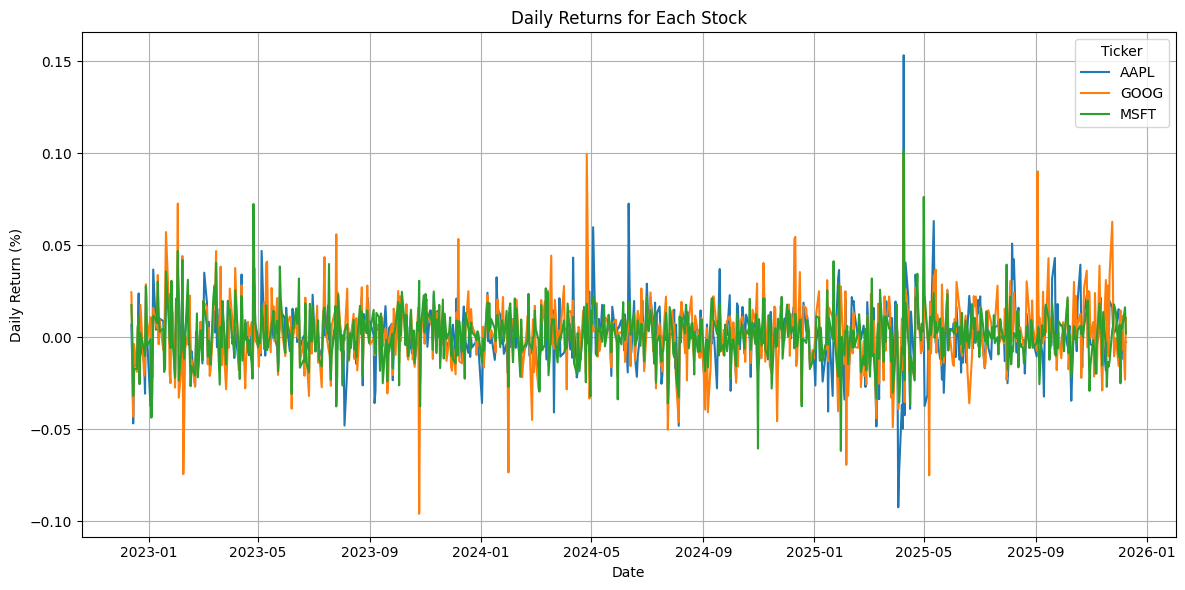

Plot of daily returns displayed.


In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for column in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[column], label=column)

plt.title('Daily Returns for Each Stock')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Plot of daily returns displayed.")

### Covariance Matrix


In [9]:
covariance_matrix = daily_returns.cov()
print("Covariance Matrix of Daily Returns:")
print(covariance_matrix)

Covariance Matrix of Daily Returns:
Ticker      AAPL      GOOG      MSFT
Ticker                              
AAPL    0.000270  0.000148  0.000121
GOOG    0.000148  0.000364  0.000144
MSFT    0.000121  0.000144  0.000217


## Generate Random Portfolio Weights

Generate at least 5,000 sets of random weights, ensuring that the sum of weights for each portfolio equals 1.

In [10]:
import numpy as np

num_portfolios = 5000
num_stocks = len(tickers)

all_weights = np.zeros((num_portfolios, num_stocks))

for i in range(num_portfolios):
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)  # Normalize weights to sum to 1
    all_weights[i, :] = weights

print(f"Generated {num_portfolios} random portfolios with {num_stocks} stocks each.")
print("First 5 sets of portfolio weights:")
print(all_weights[:5])
print("Sum of weights for the first 5 portfolios (should be 1):")
print(np.sum(all_weights[:5], axis=1))

Generated 5000 random portfolios with 3 stocks each.
First 5 sets of portfolio weights:
[[0.32834388 0.23940173 0.43225439]
 [0.0879592  0.42618503 0.48585577]
 [0.0750653  0.60625559 0.31867911]
 [0.70433446 0.13835157 0.15731397]
 [0.36328749 0.50287149 0.13384103]]
Sum of weights for the first 5 portfolios (should be 1):
[1. 1. 1. 1. 1.]


In [11]:
print(all_weights[:5]) # the first 5 sets of the generated random portfolio weights:

[[0.32834388 0.23940173 0.43225439]
 [0.0879592  0.42618503 0.48585577]
 [0.0750653  0.60625559 0.31867911]
 [0.70433446 0.13835157 0.15731397]
 [0.36328749 0.50287149 0.13384103]]


## Calculate Annual Portfolio Risk (Volatility)


In [13]:
portfolio_volatility = np.zeros(num_portfolios)

for i in range(num_portfolios):
    # Calculate portfolio variance (Wᵀ * Covariance Matrix * W)
    # np.dot(all_weights[i].T, np.dot(covariance_matrix, all_weights[i]))
    # The above is correct for matrix multiplication, but for element-wise and sum it can be simplified:
    variance = np.dot(all_weights[i].T, np.dot(covariance_matrix.values, all_weights[i]))

    # Annualize volatility (Annual Risk = sqrt(Variance) * sqrt(252))
    portfolio_volatility[i] = np.sqrt(variance) * np.sqrt(252)

print("First 5 portfolio annual volatilities:")
print(portfolio_volatility[:5])

First 5 portfolio annual volatilities:
[0.21172503 0.2246549  0.24174865 0.22903813 0.23359358]


###Annual Portfolio Return


In [12]:
portfolio_returns = np.dot(all_weights, expected_daily_returns) * 252

print("First 5 portfolio annual returns:")
print(portfolio_returns[:5])

First 5 portfolio annual returns:
[0.3067025  0.34444528 0.38047467 0.2858824  0.35933102]


## plot Portfolio Risk and Return


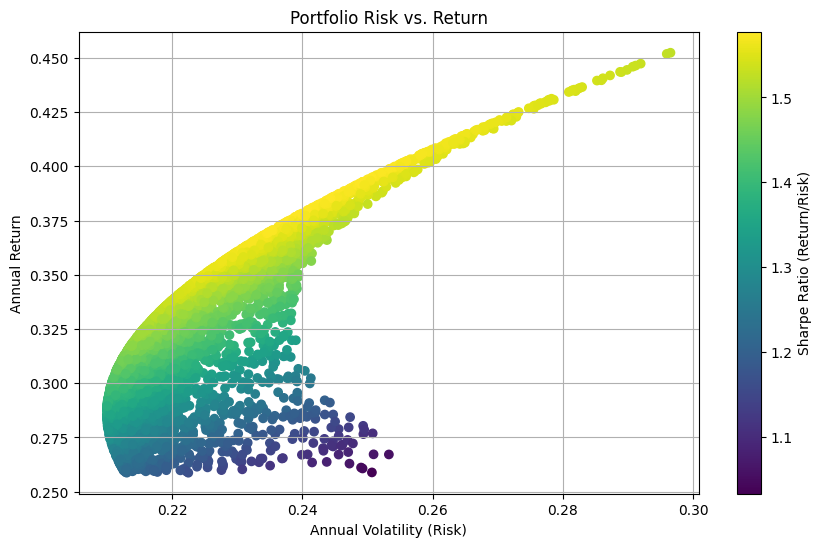

Scatter plot of portfolio risk vs. return displayed.


In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c=portfolio_returns / portfolio_volatility, marker='o', cmap='viridis')
plt.title('Portfolio Risk vs. Return')
plt.xlabel('Annual Volatility (Risk)')
plt.ylabel('Annual Return')
plt.colorbar(label='Sharpe Ratio (Return/Risk)')
plt.grid(True)
plt.show()

print("Scatter plot of portfolio risk vs. return displayed.")

Risk pertains to the possibility of losing money, while return indicates the profit or loss potential from an investment. Generally, higher-risk investments offer the potential for greater returns, while lower-risk investments tend to offer more modest returns.

Because various asset classes perform well at different times, having diverse investments can help shelter you from lower-than-expected returns. This way, if one of your investments performs poorly, you're unlikely to lose all your money because you have balanced the overall risk of your portfolio.

##  Key Portfolios

Highlight the following:
*   Minimum Variance Portfolio (MVP)
*   Maximum Return Portfolio
*   Maximum Sharpe Ratio Portfolio (optional if you choose a risk-free rate)

In [20]:
# Calculate Sharpe Ratio (assuming a risk-free rate of 0 for simplicity)
sharpe_ratio = portfolio_returns / portfolio_volatility

# Find the index of the Minimum Volatility Portfolio (MVP)
min_volatility_idx = np.argmin(portfolio_volatility)

# Find the index of the Maximum Return Portfolio
max_return_idx = np.argmax(portfolio_returns)

# Find the index of the Maximum Sharpe Ratio Portfolio
max_sharpe_idx = np.argmax(sharpe_ratio)

# Get the corresponding portfolio characteristics for each key portfolio
mvp_volatility = portfolio_volatility[min_volatility_idx]
mvp_return = portfolio_returns[min_volatility_idx]
mvp_weights = all_weights[min_volatility_idx]

max_return_volatility = portfolio_volatility[max_return_idx]
max_return_return = portfolio_returns[max_return_idx]
max_return_weights = all_weights[max_return_idx]

max_sharpe_volatility = portfolio_volatility[max_sharpe_idx]
max_sharpe_return = portfolio_returns[max_sharpe_idx]
max_sharpe_weights = all_weights[max_sharpe_idx]


## Key Portfolios


In [21]:
print("Minimum Volatility Portfolio:")
print(f"  Volatility: {mvp_volatility:.4f}")
print(f"  Return: {mvp_return:.4f}")
print(f"  Weights: {mvp_weights}")

print("\nMaximum Return Portfolio:")
print(f"  Volatility: {max_return_volatility:.4f}")
print(f"  Return: {max_return_return:.4f}")
print(f"  Weights: {max_return_weights}")

print("\nMaximum Sharpe Ratio Portfolio:")
print(f"  Volatility: {max_sharpe_volatility:.4f}")
print(f"  Return: {max_sharpe_return:.4f}")
print(f"  Sharpe Ratio: {sharpe_ratio[max_sharpe_idx]:.4f}")
print(f"  Weights: {max_sharpe_weights}")

Minimum Volatility Portfolio:
  Volatility: 0.2099
  Return: 0.2856
  Weights: [0.33696368 0.13381126 0.52922506]

Maximum Return Portfolio:
  Volatility: 0.2965
  Return: 0.4524
  Weights: [0.02775266 0.96559232 0.00665501]

Maximum Sharpe Ratio Portfolio:
  Volatility: 0.2446
  Return: 0.3859
  Sharpe Ratio: 1.5774
  Weights: [0.12987182 0.63378154 0.23634664]


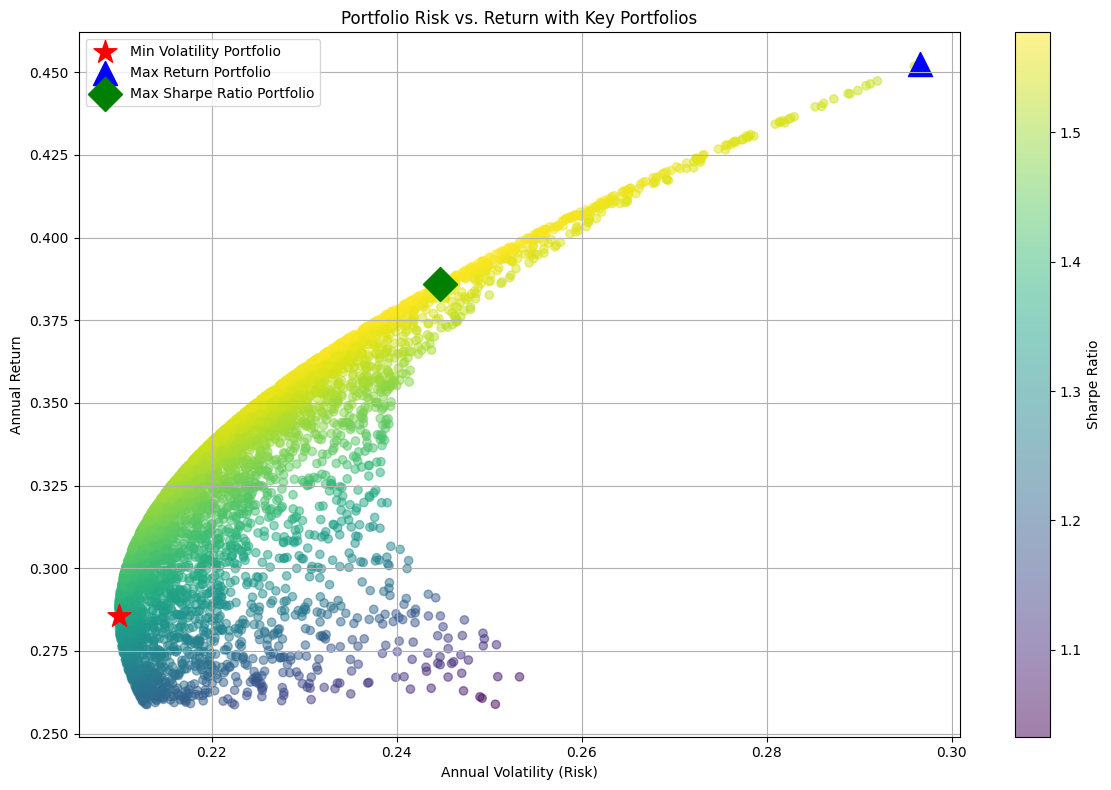

Plot with highlighted key portfolios displayed.


In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratio, cmap='viridis', marker='o', alpha=0.5)
plt.title('Portfolio Risk vs. Return with Key Portfolios')
plt.xlabel('Annual Volatility (Risk)')
plt.ylabel('Annual Return')
plt.colorbar(label='Sharpe Ratio')

# Highlight MVP
plt.scatter(mvp_volatility, mvp_return, color='red', marker='*', s=300, label='Min Volatility Portfolio')
# Highlight Max Return Portfolio
plt.scatter(max_return_volatility, max_return_return, color='blue', marker='^', s=300, label='Max Return Portfolio')
# Highlight Max Sharpe Ratio Portfolio
plt.scatter(max_sharpe_volatility, max_sharpe_return, color='green', marker='D', s=300, label='Max Sharpe Ratio Portfolio')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Plot with highlighted key portfolios displayed.")

## plot Efficient Frontier


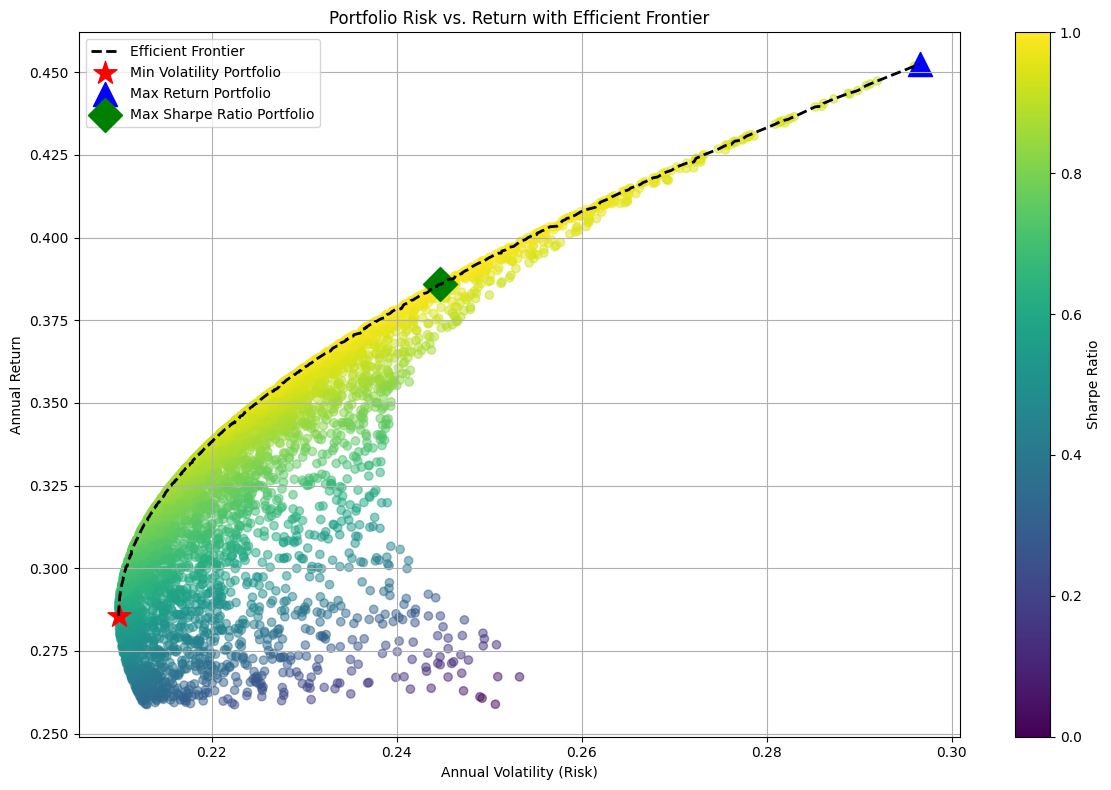

Plot with Efficient Frontier and highlighted key portfolios displayed.


In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot all random portfolios
plt.scatter(portfolios_df['Volatility'], portfolios_df['Return'], c=portfolios_df['Sharpe Ratio'], cmap='viridis', marker='o', alpha=0.5, label='_nolegend_')

# Plot the Efficient Frontier
plt.plot(efficient_frontier_df['Volatility'], efficient_frontier_df['Return'], color='black', linestyle='--', linewidth=2, label='Efficient Frontier')

# Highlight MVP
plt.scatter(mvp_volatility, mvp_return, color='red', marker='*', s=300, label='Min Volatility Portfolio')
# Highlight Max Return Portfolio
plt.scatter(max_return_volatility, max_return_return, color='blue', marker='^', s=300, label='Max Return Portfolio')
# Highlight Max Sharpe Ratio Portfolio
plt.scatter(max_sharpe_volatility, max_sharpe_return, color='green', marker='D', s=300, label='Max Sharpe Ratio Portfolio')

plt.title('Portfolio Risk vs. Return with Efficient Frontier')
plt.xlabel('Annual Volatility (Risk)')
plt.ylabel('Annual Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Plot with Efficient Frontier and highlighted key portfolios displayed.")

The plot will also highlight the Minimum Volatility, Maximum Return, and Maximum Sharpe Ratio portfolios for better visualization.


## Data for Efficient Frontier



In [23]:
import pandas as pd

# dictionary to hold the portfolio data
portfolios_data = {
    'Volatility': portfolio_volatility,
    'Return': portfolio_returns,
    'Sharpe Ratio': sharpe_ratio
}

# Convert the dictionary intoa pandas dataFrame
portfolios_df = pd.DataFrame(portfolios_data)

print("Combined portfolios DataFrame created:")
portfolios_df.head()

Combined portfolios DataFrame created:


,Volatility,Return,Sharpe Ratio
0,0.211725,0.306702,1.448589
1,0.224655,0.344445,1.533220
2,0.241749,0.380475,1.573844
3,0.229038,0.285882,1.248187
4,0.233594,0.359331,1.538274


##  Efficient Frontier


In [24]:

# 1. Sort the portfolios_df DataFrame by the 'Volatility' column in ascending order.
sorted_portfolios_df = portfolios_df.sort_values(by='Volatility', ascending=True)

# 2. Initialize an empty list to store the portfolios that lie on the efficient frontier.
efficient_frontier_portfolios = []

# 3. Initialize a variable to a very small negative number to keep track of the maximum return encountered so far.
max_return_so_far = -np.inf

# 4. Iterate through each row of the sorted_portfolios_df:
for index, row in sorted_portfolios_df.iterrows():
    # a. For each portfolio, check if its 'Return' is greater than max_return_so_far.
    if row['Return'] > max_return_so_far:
        # b. If it is, append this portfolio to the efficient_frontier_portfolios list and update max_return_so_far.
        efficient_frontier_portfolios.append(row)
        max_return_so_far = row['Return']

# 5. Convert the efficient_frontier_portfolios list into a new DataFrame.
efficient_frontier_df = pd.DataFrame(efficient_frontier_portfolios)

print("Efficient Frontier DataFrame created with the following head:")
efficient_frontier_df.head()

Efficient Frontier DataFrame created with the following head:


,Volatility,Return,Sharpe Ratio
643,0.209943,0.285574,1.360246
3231,0.209951,0.287367,1.368734
2641,0.209969,0.288520,1.374113
3932,0.209982,0.288920,1.375924
1624,0.209997,0.289314,1.377705



To identify the efficient frontier, I will sort the portfolios by volatility and then iterate through them to select only those that offer the highest return for each level of risk, storing these in a new DataFrame.

The efficient frontier was  calculated by sorting the portfolios_df by volatility and then each selecting portfolios that offered the maximum return for each level of risk. This process resulted in the efficient_frontier_df, which contains only portfolios that provide the highest return for a given or lower level of risk.



The efficient_frontier_dfwill be used to highlight specific optimal portfolios, such as the Minimum Volatility, Maximum Return, and Maximum Sharpe Ratio portfolios, to provide clear benchmarks for investment strategies.